In [1]:
## VERTICAL MERGING OF TWO IMAGES USING THIS SCRIPT

from PIL import Image
import os

def merge_images_vertically(image_path1, image_path2, output_path):
    """
    Merges two images vertically.

    Args:
        image_path1 (str): Path to the first image.
        image_path2 (str): Path to the second image.
        output_path (str): Path to save the merged image.
    """
    try:
        img1 = Image.open(image_path1).convert("RGBA")
        img2 = Image.open(image_path2).convert("RGBA")
    except FileNotFoundError:
        print(f"Error: One or both image files not found.")
        print(f"Attempted paths: {image_path1}, {image_path2}")
        return
    except Exception as e:
        print(f"Error opening images: {e}")
        return

    # Ensure both images have the same width. If not, resize the smaller one.
    if img1.width != img2.width:
        print("Warning: Image widths are different. Resizing to match the wider image.")
        max_width = max(img1.width, img2.width)
        img1 = img1.resize((max_width, int(img1.height * (max_width / img1.width))))
        img2 = img2.resize((max_width, int(img2.height * (max_width / img2.width))))

    # Create a new image with the combined height and maximum width
    total_height = img1.height + img2.height
    merged_image = Image.new('RGBA', (img1.width, total_height))

    # Paste the images onto the new image
    merged_image.paste(img1, (0, 0))
    merged_image.paste(img2, (0, img1.height))

    # Save the merged image
    try:
        merged_image.save(output_path)
        print(f"Images merged successfully and saved to {output_path}")
    except Exception as e:
        print(f"Error saving merged image: {e}")

if __name__ == "__main__":
    # Example Usage:
    # Create some dummy image files for demonstration
    # (You can replace these with your actual image paths)

    # Create a dummy image 1
    try:
        dummy_img1 = Image.new('RGB', (400, 300), color = 'red')
        dummy_img1.save("image1.png")
        print("Created dummy image1.png")
    except Exception as e:
        print(f"Error creating dummy image1: {e}")

    # Create a dummy image 2 (slightly different width for demonstration)
    try:
        dummy_img2 = Image.new('RGB', (350, 400), color = 'blue')
        dummy_img2.save("image2.png")
        print("Created dummy image2.png")
    except Exception as e:
        print(f"Error creating dummy image2: {e}")

    # Define your image paths
    # image1_path = "D:\\INCOIS\\Research\\radio_sonde\\schematic_1.png"
    # image2_path = "D:\\INCOIS\\Research\\radio_sonde\\schematic_2.png"
    # output_merged_path = "D:\\INCOIS\\Research\\radio_sonde\\merged_image_vertical.png"

    # image1_path = "D:\\Projects\\my_projects\\work\\radio_sonde\\launch_location.png"
    # image2_path = "D:\\Projects\\my_projects\\work\\radio_sonde\\launch_time_1.png"
    # output_merged_path = "D:\\Projects\\my_projects\\work\\radio_sonde\\rs_merge.png"

    image1_path = "D:\\Projects\\my_projects\\work\\radio_sonde\\launch_locations.png"
    image2_path = "D:\\Projects\\my_projects\\work\\radio_sonde\\launch_time_2.png"
    output_merged_path = "D:\\Projects\\my_projects\\work\\radio_sonde\\merge_product_1.png"

    # Call the function to merge images

    merge_images_vertically(image1_path, image2_path, output_merged_path)

    # Clean up dummy images (optional)
    # if os.path.exists("image1.png"):
    #     os.remove("image1.png")
    # if os.path.exists("image2.png"):
    #     os.remove("image2.png")

Created dummy image1.png
Created dummy image2.png
Images merged successfully and saved to D:\Projects\my_projects\work\radio_sonde\merge_product_1.png


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

def merge_images_grid_with_annotations(
    image_paths, # A list of 4 image paths
    annotations=['a', 'b', 'c', 'd'],
    output_path=None
):
    """
    Displays four images in a 2x2 grid using Matplotlib, with annotations
    at the bottom center of each image.

    Args:
        image_paths (list): A list containing paths to the four images
                            in order: top-left, top-right, bottom-left, bottom-right.
        annotations (list): A list of four strings for annotations (default: ['a', 'b', 'c', 'd']).
        output_path (str, optional): Path to save the merged figure.
                                     If None, the figure is just displayed.
    """
    if len(image_paths) != 4:
        print("Error: Please provide exactly four image paths.")
        return
    if len(annotations) != 4:
        print("Error: Please provide exactly four annotations.")
        return

    images = []
    max_width = 0
    max_height = 0

    # Load images and find max dimensions
    for i, path in enumerate(image_paths):
        try:
            img = Image.open(path).convert("RGBA")
            images.append(img)
            if img.width > max_width:
                max_width = img.width
            if img.height > max_height:
                max_height = img.height
        except FileNotFoundError:
            print(f"Error: Image file not found: {path}")
            return
        except Exception as e:
            print(f"Error opening image {path}: {e}")
            return

    # Resize all images to the largest width and height to ensure consistent cell size
    # This maintains aspect ratio, padding with transparent pixels if necessary.
    processed_images_np = []
    for img in images:
        # Create a new blank image with max_width and max_height
        resized_img = Image.new("RGBA", (max_width, max_height), (0, 0, 0, 0)) # Transparent background
        # Calculate paste position to center the image
        x_offset = (max_width - img.width) // 2
        y_offset = (max_height - img.height) // 2
        resized_img.paste(img, (x_offset, y_offset))
        processed_images_np.append(np.asarray(resized_img))

    # Create a figure with a 2x2 grid of subplots
    # Adjust figsize based on the max dimensions of your images
    # A multiplier (e.g., / 100) helps convert pixels to inches for figsize
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(max_width * 2 / 100, max_height * 2 / 100)) # 2x2 grid dimensions

    # Flatten the axs array for easy iteration over subplots
    axs = axs.flatten()

    # Iterate through images and subplots, displaying each image and adding annotation
    for i in range(4):
        ax = axs[i]
        ax.imshow(processed_images_np[i])
        ax.axis('off')  # Hide axes for cleaner image display

        # Add annotation at the bottom center of the image
        # The coordinates (0.5, 0) are relative to the axes:
        # 0.5 is horizontal center, 0 is bottom edge.
        # `transform=ax.transAxes` ensures coordinates are relative to the subplot's axes.
        # `va='top'` aligns the top of the text with the specified y-coordinate (0),
        # effectively placing it just below the image.
        ax.text(0.5, 0, annotations[i],
                color='black', fontsize=16, ha='center', va='top',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.2'),
                transform=ax.transAxes)

    # Adjust layout to prevent titles/images from overlapping
    plt.tight_layout()

    # Save the figure if an output path is provided
    if output_path:
        try:
            plt.savefig(output_path, bbox_inches='tight', pad_inches=0.05) # Add a small pad to bbox_inches
            print(f"Merged grid figure saved to {output_path}")
        except Exception as e:
            print(f"Error saving merged figure: {e}")
    else:
        plt.show() # Display the figure if not saving

if __name__ == "__main__":
    # Create some dummy image files for demonstration
    try:
        Image.new('RGB', (300, 250), color='red').save("image_tl.png")
        Image.new('RGB', (320, 270), color='green').save("image_tr.png")
        Image.new('RGB', (280, 230), color='blue').save("image_bl.png")
        Image.new('RGB', (350, 290), color='yellow').save("image_br.png")
        print("Created dummy images for grid.")
    except Exception as e:
        print(f"Error creating dummy images: {e}")

    # Define your image paths in order: top-left, top-right, bottom-left, bottom-right
    image_paths_for_grid = [
        "D:\\INCOIS\\BORI\\image_inputs\\1.png", # Top-left
        "D:\\INCOIS\\BORI\\image_inputs\\2.png", # Top-right
        "D:\\INCOIS\\BORI\\image_inputs\\5.png", # Bottom-left
        "D:\\INCOIS\\BORI\\image_inputs\\ship_survey.jpg"  # Bottom-right
    ]

    # Define your annotations
    grid_annotations = ['(a)', '(b)', '(c)', '(d)'] # Using parentheses for common scientific notation

    output_grid_path = "D:\\INCOIS\\BORI\\image_inputs\\merged_grid_with_annotations.png"

    # Display the merged images (figure)
    print("\nDisplaying the grid without saving...")
    merge_images_grid_with_annotations(image_paths_for_grid, grid_annotations)

    # Optionally save the merged figure
    print("\nSaving the grid...")
    merge_images_grid_with_annotations(image_paths_for_grid, grid_annotations, output_grid_path)

    # Clean up dummy images (optional)
    # for img_file in ["image_tl.png", "image_tr.png", "image_bl.png", "image_br.png"]:
    #     if os.path.exists(img_file):
    #         os.remove(img_file)

Created dummy images for grid.

Displaying the grid with uniform resize to (300, 240) without saving...


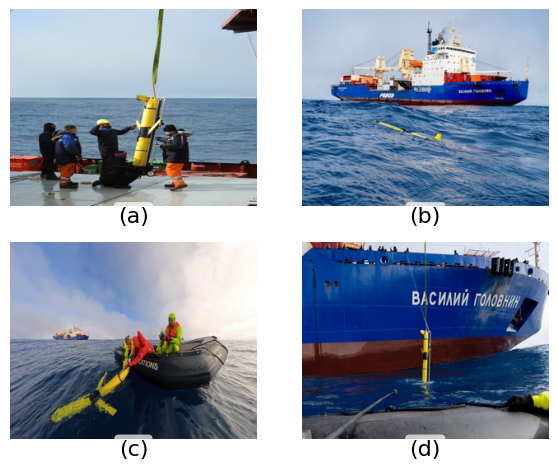


Saving the grid with uniform resize to (300, 240)...
Merged grid figure saved to D:\INCOIS\pics\glider_dep\merged_grid_uniform_resize_with_annotations.png


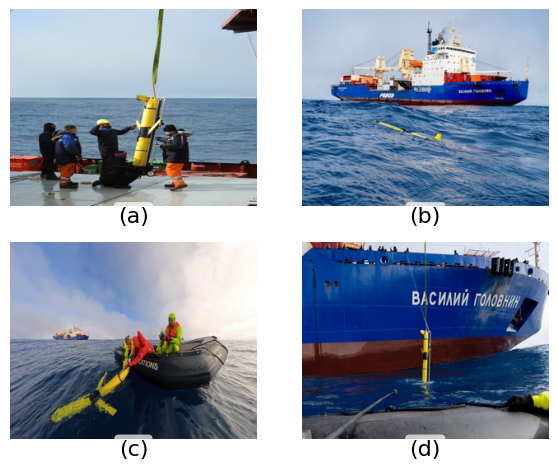

In [3]:
## GRID MERGING OF FOUR IMAGES USING THIS SCRIPT INTO A 2 X 2 GRID OF IMAGES WITH ANNOTATIONS.

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

def merge_images_grid_with_annotations_uniform_resize(
    image_paths, # A list of 4 image paths
    uniform_size=(300, 300), # New: Define the uniform size (width, height)
    annotations=['a', 'b', 'c', 'd'],
    output_path=None
):
    """
    Displays four images in a 2x2 grid using Matplotlib, with annotations
    at the bottom center of each image. All input images are resized to
    a specified uniform size.

    Args:
        image_paths (list): A list containing paths to the four images
                            in order: top-left, top-right, bottom-left, bottom-right.
        uniform_size (tuple): A tuple (width, height) specifying the target size
                              for all images. Aspect ratio will be ignored if sizes differ.
        annotations (list): A list of four strings for annotations (default: ['a', 'b', 'c', 'd']).
        output_path (str, optional): Path to save the merged figure.
                                     If None, the figure is just displayed.
    """
    if len(image_paths) != 4:
        print("Error: Please provide exactly four image paths.")
        return
    if len(annotations) != 4:
        print("Error: Please provide exactly four annotations.")
        return

    processed_images_np = []

    # Process each image: open, resize, and convert to NumPy array
    for i, path in enumerate(image_paths):
        try:
            img = Image.open(path).convert("RGBA")
            # Resize the image to the uniform_size.
            # This will change the aspect ratio if the original size is different.
            resized_img = img.resize(uniform_size)
            processed_images_np.append(np.asarray(resized_img))
        except FileNotFoundError:
            print(f"Error: Image file not found: {path}")
            return
        except Exception as e:
            print(f"Error opening or resizing image {path}: {e}")
            return

    # Extract width and height from the uniform_size for figsize calculation
    uniform_width, uniform_height = uniform_size

    # Create a figure with a 2x2 grid of subplots
    # figsize calculated based on the uniform_size for each image
    fig, axs = plt.subplots(
        nrows=2, ncols=2,
        figsize=(uniform_width * 2 / 100, uniform_height * 2 / 100) # 2x2 grid dimensions
    )

    # Flatten the axs array for easy iteration over subplots
    axs = axs.flatten()

    # Iterate through images and subplots, displaying each image and adding annotation
    for i in range(4):
        ax = axs[i]
        ax.imshow(processed_images_np[i])
        ax.axis('off')  # Hide axes for cleaner image display

        # Add annotation at the bottom center of the image
        ax.text(0.5, 0, annotations[i],
                color='black', fontsize=16, ha='center', va='top',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.2'),
                transform=ax.transAxes)  # text size (0.5 to 0.2), fontsize = (16 to 12), 

    # Adjust layout to prevent titles/images from overlapping
    plt.tight_layout()

    # Save the figure if an output path is provided
    if output_path:
        try:
            plt.savefig(output_path, bbox_inches='tight', pad_inches=0.05) #changed from 0.05 to 0.02
            print(f"Merged grid figure saved to {output_path}")
        except Exception as e:
            print(f"Error saving merged figure: {e}")
    else:
        plt.show() # Display the figure if not saving

if __name__ == "__main__":
    # Create some dummy image files for demonstration
    # Notice the dummy images still have different original sizes
    try:
        Image.new('RGB', (300, 250), color='red').save("image_tl_orig.png")
        Image.new('RGB', (320, 270), color='green').save("image_tr_orig.png")
        Image.new('RGB', (280, 230), color='blue').save("image_bl_orig.png")
        Image.new('RGB', (350, 290), color='yellow').save("image_br_orig.png")
        print("Created dummy images for grid.")
    except Exception as e:
        print(f"Error creating dummy images: {e}")

    # Define your image paths
    image_paths_for_grid = [
        "D:\\INCOIS\\pics\\glider_dep\\2.jpg", # Top-left
        "D:\\INCOIS\\pics\\glider_dep\\5.jpg", # Top-right
        "D:\\INCOIS\\pics\\glider_dep\\6.jpg", # Bottom-left
        "D:\\INCOIS\\pics\\glider_dep\\7.jpg"  # Bottom-right
    ]


    # Define the desired uniform size for ALL images
    # All images will be resized to 200x200 pixels
    desired_uniform_size = (300, 240)

    # Define your annotations
    grid_annotations = ['(a)', '(b)', '(c)', '(d)']

    output_grid_path_uniform = "D:\\INCOIS\\pics\\glider_dep\\merged_grid_uniform_resize_with_annotations.png"
    
    # Display the merged images (figure)
    print(f"\nDisplaying the grid with uniform resize to {desired_uniform_size} without saving...")
    merge_images_grid_with_annotations_uniform_resize(
        image_paths_for_grid,
        uniform_size=desired_uniform_size,
        annotations=grid_annotations
    )

    # Optionally save the merged figure
    print(f"\nSaving the grid with uniform resize to {desired_uniform_size}...")
    merge_images_grid_with_annotations_uniform_resize(
        image_paths_for_grid,
        uniform_size=desired_uniform_size,
        annotations=grid_annotations,
        output_path=output_grid_path_uniform
    )

    # Clean up dummy images (optional)
    # for img_file in ["image_tl_orig.png", "image_tr_orig.png", "image_bl_orig.png", "image_br_orig.png"]:
    #     if os.path.exists(img_file):
    #         os.remove(img_file)

In [2]:
from PIL import Image, ImageDraw, ImageFont
import os

def merge_images_horizontally(image_path1, image_path2, output_path, annotation_a='(a)', annotation_b='(b)'):
    """
    Merges two images horizontally and adds annotations (a) and (b).

    Args:
        image_path1 (str): Path to the first image (will be on the left, annotated with 'a').
        image_path2 (str): Path to the second image (will be on the right, annotated with 'b').
        output_path (str): Path to save the merged image.
        annotation_a (str): Text for the first image's annotation.
        annotation_b (str): Text for the second image's annotation.
    """
    try:
        img1 = Image.open(image_path1).convert("RGBA")
        img2 = Image.open(image_path2).convert("RGBA")
    except FileNotFoundError:
        print(f"Error: One or both image files not found.")
        print(f"Attempted paths: {image_path1}, {image_path2}")
        return
    except Exception as e:
        print(f"Error opening images: {e}")
        return

    # --- Add Annotations to Individual Images ---
    # Define font and color for annotations
    try:
        # Try to use a common sans-serif font, otherwise fallback to default
        font = ImageFont.truetype("arial.ttf", 40)
    except IOError:
        font = ImageFont.load_default()
        print("Warning: Arial font not found, using default font for annotations.")

    text_color = (0, 0, 0, 255) # Black color for text

    # Add annotation to image 1
    draw1 = ImageDraw.Draw(img1)
    # Position the text slightly from the top-left corner
    draw1.text((10, 10), annotation_a, font=font, fill=text_color)
    del draw1 # Release drawing object

    # Add annotation to image 2
    draw2 = ImageDraw.Draw(img2)
    draw2.text((10, 10), annotation_b, font=font, fill=text_color)
    del draw2 # Release drawing object

    # --- Merge Images Horizontally ---
    # Ensure both images have the same height. If not, resize the smaller one.
    if img1.height != img2.height:
        print("Warning: Image heights are different. Resizing to match the taller image.")
        max_height = max(img1.height, img2.height)
        img1 = img1.resize((int(img1.width * (max_height / img1.height)), max_height))
        img2 = img2.resize((int(img2.width * (max_height / img2.height)), max_height))

    # Create a new image with the combined width and maximum height
    total_width = img1.width + img2.width
    merged_image = Image.new('RGBA', (total_width, img1.height))

    # Paste the images onto the new image side-by-side
    merged_image.paste(img1, (0, 0))            # img1 on the left, starting at x=0
    merged_image.paste(img2, (img1.width, 0))   # img2 on the right, starting after img1's width

    # Save the merged image
    try:
        merged_image.save(output_path)
        print(f"Images merged successfully and saved to {output_path}")
    except Exception as e:
        print(f"Error saving merged image: {e}")

if __name__ == "__main__":
    # Example Usage:
    # First, let's create some dummy image files for demonstration.
    # You would replace these with paths to your actual images.

    # Create dummy image 1
    try:
        dummy_img1 = Image.new('RGB', (400, 300), color='red')
        dummy_img1.save("image_left.png")
        print("Created dummy image_left.png")
    except Exception as e:
        print(f"Error creating dummy image_left: {e}")

    # Create dummy image 2 (slightly different height for demonstration)
    try:
        dummy_img2 = Image.new('RGB', (350, 400), color='blue')
        dummy_img2.save("image_right.png")
        print("Created dummy image_right.png")
    except Exception as e:
        print(f"Error creating dummy image_right: {e}")

    print("\n--- Merging Images Horizontally ---")
    # Define your image paths
    image1_path = "glider_transects_io_1.jpeg"
    image2_path = "glider_transects_io_2.jpeg"
    output_merged_path = "merged_image_horizontal.png"

    # Call the function to merge images horizontally with annotations
    merge_images_horizontally(image1_path, image2_path, output_merged_path, annotation_a='(a)', annotation_b='(b)')

    # --- Optional: Clean up dummy images ---
    # Uncomment the lines below if you want to remove the temporary dummy images
    # if os.path.exists("image_left.png"):
    #     os.remove("image_left.png")
    # if os.path.exists("image_right.png"):
    #     os.remove("image_right.png")

Created dummy image_left.png
Created dummy image_right.png

--- Merging Images Horizontally ---
Images merged successfully and saved to merged_image_horizontal.png


In [4]:
from PIL import Image, ImageDraw, ImageFont
import os

def get_font(size):
    """Attempts to load a TrueType font, falls back to default if not found."""
    try:
        # Common fonts: Arial (Windows), DejaVuSans (Linux), Helvetica (macOS often aliased)
        font_names = ["arial.ttf", "DejaVuSans.ttf", "Helvetica.ttf", "LiberationSans-Regular.ttf"]
        for font_name in font_names:
            try:
                return ImageFont.truetype(font_name, size)
            except IOError:
                continue # Try next font
        # If no TrueType font found, use default bitmap font
        print(f"Warning: No common TrueType font found, using default font for annotations.")
        return ImageFont.load_default(size=size) # Use a larger default size
    except Exception as e:
        print(f"Error loading font: {e}. Using default.")
        return ImageFont.load_default(size=size)


def merge_images_horizontally(image_path1, image_path2, output_path, annotation_a='(a)', annotation_b='(b)', padding=50):
    """
    Merges two images horizontally with consistent annotations and padding.

    Args:
        image_path1 (str): Path to the first image (will be on the left, annotated with 'a').
        image_path2 (str): Path to the second image (will be on the right, annotated with 'b').
        output_path (str): Path to save the merged image.
        annotation_a (str): Text for the first image's annotation.
        annotation_b (str): Text for the second image's annotation.
        padding (int): Amount of padding (in pixels) to add around each image.
                        This padding will be white.
    """
    try:
        img1_orig = Image.open(image_path1).convert("RGBA")
        img2_orig = Image.open(image_path2).convert("RGBA")
    except FileNotFoundError:
        print(f"Error: One or both image files not found.")
        print(f"Attempted paths: {image_path1}, {image_path2}")
        return
    except Exception as e:
        print(f"Error opening images: {e}")
        return

    # --- Step 1: Resize images to have consistent height ---
    if img1_orig.height != img2_orig.height:
        print("Warning: Image heights are different. Resizing to match the taller image.")
        max_height = max(img1_orig.height, img2_orig.height)
        img1_resized = img1_orig.resize((int(img1_orig.width * (max_height / img1_orig.height)), max_height))
        img2_resized = img2_orig.resize((int(img2_orig.width * (max_height / img2_orig.height)), max_height))
    else:
        img1_resized = img1_orig
        img2_resized = img2_orig

    # --- Step 2: Add padding around each resized image ---
    padded_width1 = img1_resized.width + 2 * padding
    padded_height1 = img1_resized.height + 2 * padding
    padded_img1 = Image.new('RGBA', (padded_width1, padded_height1), color=(255, 255, 255, 255)) # White background
    padded_img1.paste(img1_resized, (padding, padding))

    padded_width2 = img2_resized.width + 2 * padding
    padded_height2 = img2_resized.height + 2 * padding
    padded_img2 = Image.new('RGBA', (padded_width2, padded_height2), color=(255, 255, 255, 255)) # White background
    padded_img2.paste(img2_resized, (padding, padding))

    # --- Step 3: Add Annotations to the padded images ---
    # Annotations font size - adjusted based on average image height if needed, or fixed
    # Using a fixed size like 40 or 50 is usually good for (a), (b)
    annotation_font_size = 60 
    font = get_font(annotation_font_size)
    text_color = (0, 0, 0, 255) # Black color for text

    # Add annotation to padded_img1
    draw1 = ImageDraw.Draw(padded_img1)
    # Position the text inside the padding area
    draw1.text((padding + 15, padding + 15), annotation_a, font=font, fill=text_color)
    del draw1

    # Add annotation to padded_img2
    draw2 = ImageDraw.Draw(padded_img2)
    draw2.text((padding + 15, padding + 15), annotation_b, font=font, fill=text_color)
    del draw2

    # --- Step 4: Merge the padded and annotated images horizontally ---
    total_width_merged = padded_img1.width + padded_img2.width
    # Heights are already consistent due to padding
    merged_image = Image.new('RGBA', (total_width_merged, padded_img1.height))

    # Paste the padded images onto the new merged image side-by-side
    merged_image.paste(padded_img1, (0, 0))
    merged_image.paste(padded_img2, (padded_img1.width, 0))

    # Save the merged image
    try:
        merged_image.save(output_path)
        print(f"Images merged successfully and saved to {output_path}")
    except Exception as e:
        print(f"Error saving merged image: {e}")

if __name__ == "__main__":
    # Example Usage:
    # Create some dummy image files for demonstration
    # (You can replace these with your actual image paths)

    # Create dummy image 1
    try:
        dummy_img1 = Image.new('RGB', (400, 300), color='lightgreen')
        dummy_img1.save("image_left_for_merge.png")
        print("Created dummy image_left_for_merge.png")
    except Exception as e:
        print(f"Error creating dummy image_left: {e}")

    # Create dummy image 2 (slightly different height for demonstration)
    try:
        dummy_img2 = Image.new('RGB', (350, 400), color='lightblue')
        dummy_img2.save("image_right_for_merge.png")
        print("Created dummy image_right_for_merge.png")
    except Exception as e:
        print(f"Error creating dummy image_right: {e}")

    print("\n--- Merging Images Horizontally with Annotations and Padding ---")
    # Define your image paths
    image1_path = "glider_transects_io_1.jpeg"
    image2_path = "glider_transects_io_2.jpeg"
    output_merged_path = "merged_image_horizontal_annotated.png"

    # Call the function to merge images
    # Adjust 'padding' value to your preference (e.g., 20, 50, 100 pixels)
    merge_images_horizontally(image1_path, image2_path, output_merged_path, padding=50)

    # --- Optional: Clean up dummy images ---
    # Uncomment the lines below if you want to remove the temporary dummy images
    # if os.path.exists("image_left_for_merge.png"):
    #     os.remove("image_left_for_merge.png")
    # if os.path.exists("image_right_for_merge.png"):
    #     os.remove("image_right_for_merge.png")

Created dummy image_left_for_merge.png
Created dummy image_right_for_merge.png

--- Merging Images Horizontally with Annotations and Padding ---
Images merged successfully and saved to merged_image_horizontal_annotated.png


In [1]:
from PIL import Image, ImageDraw, ImageFont
import os

def get_font(size):
    """
    Attempts to load a common TrueType font.
    Falls back to Pillow's default font if no TrueType font is found.
    """
    # Common font names across different OS
    font_paths = [
        "arial.ttf",  # Windows
        "DejaVuSans.ttf", # Linux
        "Helvetica.ttf",  # macOS (often aliased)
        "LiberationSans-Regular.ttf", # Linux
        "/System/Library/Fonts/Supplemental/Arial.ttf" # macOS specific path sometimes
    ]
    
    for font_name in font_paths:
        try:
            return ImageFont.truetype(font_name, size)
        except IOError:
            continue # Try the next font if not found
    
    # Fallback to default font if no TrueType font is found
    print(f"Warning: No common TrueType font found on your system. Using default font for annotations.")
    return ImageFont.load_default(size=size) # Use specified size for default font

def merge_images_horizontally_with_annotations(image_path1, image_path2, output_path, 
                                                annotation_a='(a)', annotation_b='(b)', 
                                                font_size=40, text_color=(0, 0, 0, 255), 
                                                bottom_margin=20):
    """
    Merges two images horizontally and adds annotations (a) and (b) at the bottom center of each.

    Args:
        image_path1 (str): Path to the first image (will be on the left).
        image_path2 (str): Path to the second image (will be on the right).
        output_path (str): Path to save the merged image.
        annotation_a (str): Text for the first image's annotation. Defaults to '(a)'.
        annotation_b (str): Text for the second image's annotation. Defaults to '(b)'.
        font_size (int): The size of the annotation font. Defaults to 40.
        text_color (tuple): RGBA tuple for the annotation text color. Defaults to black.
        bottom_margin (int): Margin (in pixels) from the bottom of the image for annotations. Defaults to 20.
    """
    try:
        img1 = Image.open(image_path1).convert("RGBA")
        img2 = Image.open(image_path2).convert("RGBA")
    except FileNotFoundError:
        print(f"Error: One or both image files not found.")
        print(f"Attempted paths: {image_path1}, {image_path2}")
        return
    except Exception as e:
        print(f"Error opening images: {e}")
        return

    # --- Step 1: Ensure both images have the same height ---
    if img1.height != img2.height:
        print("Warning: Image heights are different. Resizing to match the taller image while preserving aspect ratio.")
        max_height = max(img1.height, img2.height)
        img1 = img1.resize((int(img1.width * (max_height / img1.height)), max_height), Image.Resampling.LANCZOS)
        img2 = img2.resize((int(img2.width * (max_height / img2.height)), max_height), Image.Resampling.LANCZOS)

    # --- Step 2: Prepare font for annotations ---
    font = get_font(font_size)

    # --- Step 3: Add annotations to each image ---
    # Annotate img1
    draw1 = ImageDraw.Draw(img1)
    text_bbox_a = draw1.textbbox((0,0), annotation_a, font=font) # Get bounding box of text
    text_width_a = text_bbox_a[2] - text_bbox_a[0]
    text_height_a = text_bbox_a[3] - text_bbox_a[1]
    
    # Calculate position for bottom-center annotation
    pos_x1 = (img1.width - text_width_a) / 2
    pos_y1 = img1.height - text_height_a - bottom_margin
    draw1.text((pos_x1, pos_y1), annotation_a, font=font, fill=text_color)
    del draw1

    # Annotate img2
    draw2 = ImageDraw.Draw(img2)
    text_bbox_b = draw2.textbbox((0,0), annotation_b, font=font)
    text_width_b = text_bbox_b[2] - text_bbox_b[0]
    text_height_b = text_bbox_b[3] - text_bbox_b[1]
    
    pos_x2 = (img2.width - text_width_b) / 2
    pos_y2 = img2.height - text_height_b - bottom_margin
    draw2.text((pos_x2, pos_y2), annotation_b, font=font, fill=text_color)
    del draw2

    # --- Step 4: Merge images horizontally ---
    total_width = img1.width + img2.width
    merged_image = Image.new('RGBA', (total_width, img1.height))

    merged_image.paste(img1, (0, 0))            # img1 on the left
    merged_image.paste(img2, (img1.width, 0))   # img2 on the right

    # --- Step 5: Save the merged image ---
    try:
        merged_image.save(output_path)
        print(f"Images merged successfully and saved to {output_path}")
    except Exception as e:
        print(f"Error saving merged image: {e}")

if __name__ == "__main__":
    # --- Example Usage ---
    # To demonstrate, we'll create some dummy image files.
    # Replace these with your actual image paths.

    # Create dummy image 1
    try:
        dummy_img1_path = "dummy_image_left.png"
        dummy_img1 = Image.new('RGB', (600, 400), color='lightcoral')
        dummy_img1.save(dummy_img1_path)
        print(f"Created dummy image: {dummy_img1_path}")
    except Exception as e:
        print(f"Error creating dummy image 1: {e}")

    # Create dummy image 2 (different dimensions to test resizing)
    try:
        dummy_img2_path = "dummy_image_right.png"
        dummy_img2 = Image.new('RGB', (500, 500), color='lightskyblue')
        dummy_img2.save(dummy_img2_path)
        print(f"Created dummy image: {dummy_img2_path}")
    except Exception as e:
        print(f"Error creating dummy image 2: {e}")

    print("\n--- Merging Images Horizontally with Bottom-Center Annotations ---")
    
    # Define your actual image paths here:
    image1_to_merge = "glider_transects_io_1.jpeg"
    image2_to_merge = "glider_transects_io_2.jpeg"
    
    # Define the output path for the merged image:
    output_merged_image_path = "merged_figure_ab.png"

    # Call the function to merge images with annotations
    merge_images_horizontally_with_annotations(
        image1_to_merge, 
        image2_to_merge, 
        output_merged_image_path,
        font_size=40,       # You can adjust font size
        bottom_margin=30    # You can adjust margin from bottom
    )

    # --- Optional: Clean up dummy images ---
    # Uncomment these lines if you want to remove the temporary files after merging.
    # if os.path.exists(dummy_img1_path):
    #     os.remove(dummy_img1_path)
    # if os.path.exists(dummy_img2_path):
    #     os.remove(dummy_img2_path)

Created dummy image: dummy_image_left.png
Created dummy image: dummy_image_right.png

--- Merging Images Horizontally with Bottom-Center Annotations ---
Images merged successfully and saved to merged_figure_ab.png
